# API Setup & Dataset Download

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c robi-datathon-30-qualifier-problem-3

 28% 5.00M/18.1M [00:00<00:00, 21.0MB/s]
100% 18.1M/18.1M [00:00<00:00, 59.8MB/s]


In [6]:
!unzip \*.zip

Archive:  robi-datathon-30-qualifier-problem-3.zip
  inflating: boxes.csv               
  inflating: problem 3.csv           
  inflating: purchase.csv            
  inflating: sample submission 3.csv  


# Reading Dataset

In [7]:
import pandas as pd

In [8]:
boxes = pd.read_csv('boxes.csv')
purchase = pd.read_csv('purchase.csv')
problem3 = pd.read_csv('problem 3.csv')
sampleSubmission = pd.read_csv('sample submission 3.csv')

### Boxes

In [9]:
boxes.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [10]:
boxes['BOX_ID'].value_counts()

BOX_ID
1      1
218    1
198    1
197    1
196    1
      ..
97     1
96     1
95     1
94     1
290    1
Name: count, Length: 290, dtype: int64

In [11]:
boxes['DELIVERY_OPTION'].value_counts()

DELIVERY_OPTION
Delivery from Collection Point     179
Home Delivery - CoD                 75
Home Delivery - Digital Payment     36
Name: count, dtype: int64

In [12]:
boxes.isnull().sum()

BOX_ID             0
QUALITY            0
DELIVERY_OPTION    0
MILK               0
MEAT               0
UNIT_PRICE         0
dtype: int64

### Purchase

In [13]:
purchase

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0
...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0


In [14]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PURCHASE_DATE  object 
 1   MAGIC_KEY      object 
 2   BOX_ID         float64
 3   BOX_COUNT      float64
dtypes: float64(2), object(2)
memory usage: 74.9+ MB


In [15]:
purchase.isnull().sum()

PURCHASE_DATE     0
MAGIC_KEY         0
BOX_ID           47
BOX_COUNT        47
dtype: int64

In [16]:
def print_missing_data(df, name):
    # Check for missing values
    if df.isnull().any().any():
        print(f"\nRows with missing values in {name}:")
        display(df[df.isnull().any(axis=1)])
    else:
        print(f"\nNo missing values in {name}.")

# Display rows with missing values for each dataset
print_missing_data(purchase, "Purchase Data")


Rows with missing values in Purchase Data:


,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
177,1/2/2019,28FF265F082,NaN,NaN
178,1/2/2019,2CB168CDFA3,NaN,NaN
179,1/2/2019,2C2C8844F09,NaN,NaN
180,1/2/2019,2BDCCEF05A4,NaN,NaN
181,1/2/2019,2BF1D98D0B2,NaN,NaN
182,1/2/2019,2BDC3619EAF,NaN,NaN
183,1/2/2019,290D33249B7,NaN,NaN
184,1/2/2019,2BE266F8C55,NaN,NaN
185,1/2/2019,2903192D056,NaN,NaN
186,1/2/2019,2BE34886311,NaN,NaN


In [17]:
cleaned_purchase = purchase.dropna()

In [18]:
cleaned_purchase = cleaned_purchase[(cleaned_purchase['BOX_ID'] >= 1) & (cleaned_purchase['BOX_ID'] <= 290)]


In [19]:
cleaned_purchase['BOX_ID'].value_counts()

BOX_ID
163.0    226548
143.0    189194
162.0    169705
258.0    116822
255.0    100048
          ...  
242.0         1
243.0         1
93.0          1
19.0          1
109.0         1
Name: count, Length: 290, dtype: int64

In [20]:
date = cleaned_purchase['PURCHASE_DATE']

In [21]:
set(list(date))

{'1/1/2019',
 '1/10/2018',
 '1/11/2018',
 '1/12/2018',
 '1/2/2019',
 '10/1/2019',
 '10/10/2018',
 '10/11/2018',
 '10/12/2018',
 '10/2/2019',
 '11/1/2019',
 '11/10/2018',
 '11/11/2018',
 '11/12/2018',
 '11/2/2019',
 '12/1/2019',
 '12/10/2018',
 '12/11/2018',
 '12/12/2018',
 '12/2/2019',
 '13/1/2019',
 '13/10/2018',
 '13/11/2018',
 '13/12/2018',
 '13/2/2019',
 '14/1/2019',
 '14/10/2018',
 '14/11/2018',
 '14/12/2018',
 '14/2/2019',
 '15/1/2019',
 '15/10/2018',
 '15/11/2018',
 '15/12/2018',
 '15/2/2019',
 '16/1/2019',
 '16/10/2018',
 '16/11/2018',
 '16/12/2018',
 '16/2/2019',
 '17/1/2019',
 '17/10/2018',
 '17/11/2018',
 '17/12/2018',
 '17/2/2019',
 '18/1/2019',
 '18/10/2018',
 '18/11/2018',
 '18/12/2018',
 '18/2/2019',
 '19/1/2019',
 '19/10/2018',
 '19/11/2018',
 '19/12/2018',
 '19/2/2019',
 '2/1/2019',
 '2/10/2018',
 '2/11/2018',
 '2/12/2018',
 '2/2/2019',
 '20/1/2019',
 '20/10/2018',
 '20/11/2018',
 '20/12/2018',
 '20/2/2019',
 '21/1/2019',
 '21/10/2018',
 '21/11/2018',
 '21/12/2018',
 '

In [22]:
cleaned_purchase.dtypes

PURCHASE_DATE     object
MAGIC_KEY         object
BOX_ID           float64
BOX_COUNT        float64
dtype: object

In [23]:
len(cleaned_purchase)

2455800

In [24]:
import seaborn as sns

In [25]:
cleaned_purchase['BOX_COUNT'].value_counts()

BOX_COUNT
1.0     2453363
2.0        2283
3.0          85
4.0          30
6.0          17
5.0          10
7.0           3
9.0           2
19.0          2
11.0          2
8.0           1
10.0          1
13.0          1
Name: count, dtype: int64

### problem 3

In [26]:
problem3['MAGIC_KEY'].value_counts()

MAGIC_KEY
2BCFE9C06A7    1
2BD634D0FF9    1
2BD67C12BC5    1
2BD66756DC0    1
2BD65407F81    1
              ..
2CBE03A3E10    1
2CBAA0DC11E    1
2CB9874DBDA    1
2CB8ACC307C    1
2C083B1F3E5    1
Name: count, Length: 5379, dtype: int64

# Processing

In [44]:
merged_df = pd.merge(cleaned_purchase, boxes, left_on='BOX_ID', right_on='BOX_ID', how='inner')

In [47]:
merged_df

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,2C3A3F7DB65,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
3,2BD2641961A,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
4,2BD2EAA1C90,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
...,...,...,...,...,...,...,...,...
2455795,2BE6A6A7E6C,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455796,2C774DAC048,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455797,2BD1A4A1DC5,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455798,28D8EFAE836,264.0,2.0,Standard,Delivery from Collection Point,13.0,2.2,17.98


In [46]:
merged_df.drop('PURCHASE_DATE', axis=1, inplace=True)

In [30]:
merged_df = merged_df.join(pd.get_dummies(merged_df.QUALITY)).drop(['QUALITY'], axis=1)

In [31]:
merged_df = merged_df.join(pd.get_dummies(merged_df.DELIVERY_OPTION)).drop(['DELIVERY_OPTION'], axis=1)

<Axes: >

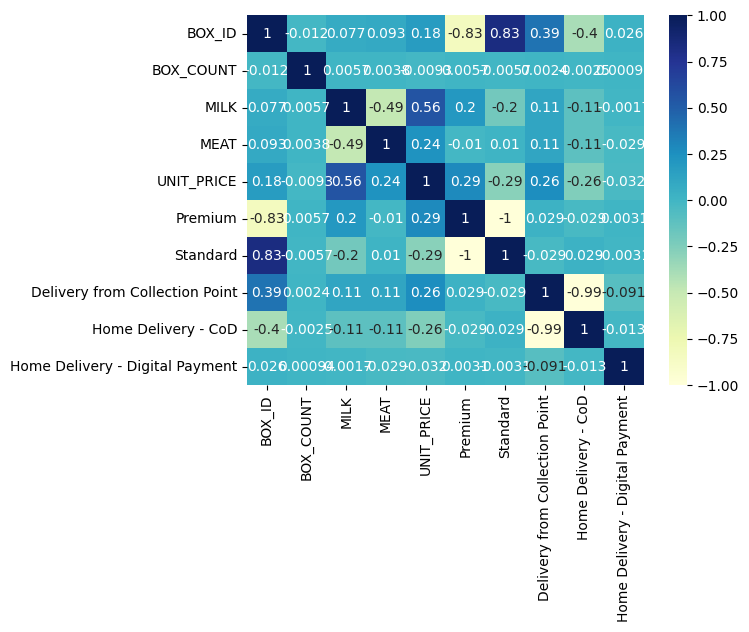

In [32]:
sns.heatmap(merged_df.drop(['MAGIC_KEY'], axis=1).corr(), annot=True, cmap="YlGnBu")

In [34]:
# merged_df = merged_df[['PURCHASE_DATE', 'MAGIC_KEY', 'BOX_COUNT', 'MEAT']]

In [48]:
merged_df['TOTAL_MEAT'] = merged_df['MEAT'] * merged_df['BOX_COUNT']

In [49]:
customer_meat_purchases = merged_df.groupby('MAGIC_KEY')['TOTAL_MEAT'].sum().reset_index()

In [50]:
customer_meat_purchases

,MAGIC_KEY,TOTAL_MEAT
0,249670911D8,2.4
1,249751FC4DD,1.8
2,24978027606,2.9
3,24979164422,2.5
4,2497B8B4FDA,5.4
...,...,...
1274082,2E6F72C6F1C,4.8
1274083,2E6F8194908,2.4
1274084,2E6F9C7B9B4,2.2
1274085,2E6FB0EBB32,12.8


In [51]:
purchase_frequency = merged_df.groupby('MAGIC_KEY').size().reset_index(name='PURCHASE_FREQUENCY')

In [52]:
purchase_frequency

,MAGIC_KEY,PURCHASE_FREQUENCY
0,249670911D8,2
1,249751FC4DD,1
2,24978027606,1
3,24979164422,1
4,2497B8B4FDA,2
...,...,...
1274082,2E6F72C6F1C,3
1274083,2E6F8194908,1
1274084,2E6F9C7B9B4,1
1274085,2E6FB0EBB32,6


In [53]:
average_purchase_size = merged_df.groupby('MAGIC_KEY')['TOTAL_MEAT'].mean().reset_index()
average_purchase_size.rename(columns={'TOTAL_MEAT': 'AVERAGE_PURCHASE_SIZE'}, inplace=True)

In [41]:
average_purchase_size

,MAGIC_KEY,AVERAGE_PURCHASE_SIZE
0,249670911D8,1.200000
1,249751FC4DD,1.800000
2,24978027606,2.900000
3,24979164422,2.500000
4,2497B8B4FDA,2.700000
...,...,...
1274082,2E6F72C6F1C,1.600000
1274083,2E6F8194908,2.400000
1274084,2E6F9C7B9B4,2.200000
1274085,2E6FB0EBB32,2.133333


In [55]:
mode_quality = merged_df.groupby('MAGIC_KEY')['QUALITY'].agg(pd.Series.mode).reset_index()
# mode_delivery = merged_df.groupby('MAGIC_KEY')['DELIVERY_OPTION'].agg(pd.Series.mode).reset_index()

In [ ]:
# mode_delivery

In [56]:
# 1. Merge total meat purchased by each customer
problem3 = pd.merge(problem3, customer_meat_purchases, on='MAGIC_KEY', how='left')

# 2. Merge purchase frequency
problem3 = pd.merge(problem3, purchase_frequency, on='MAGIC_KEY', how='left')

# 3. Merge average purchase size
problem3 = pd.merge(problem3, average_purchase_size, on='MAGIC_KEY', how='left')

# 4. Merge quality preferences
problem3 = pd.merge(problem3, mode_quality, on='MAGIC_KEY', how='left', suffixes=('', '_QUALITY'))

# 5. Merge delivery preferences
# problem3 = pd.merge(problem3, mode_delivery, on='MAGIC_KEY', how='left', suffixes=('', '_DELIVERY'))

# Display the final merged DataFrame
print(problem3.head())

# Check for any missing values after merging
print("\nMissing values after merging:")
print(problem3.isnull().sum())

     MAGIC_KEY  TOTAL_MEAT  PURCHASE_FREQUENCY  AVERAGE_PURCHASE_SIZE  QUALITY
0  2BCFE9C06A7        57.6                 5.0                  11.52  Premium
1  2C2A872B5A2         4.0                 2.0                   2.00  Premium
2  2C6A897671B         6.6                 3.0                   2.20  Premium
3  2C6F1287F53        93.0                10.0                   9.30  Premium
4  2C658198CC9         6.6                 3.0                   2.20  Premium

Missing values after merging:
MAGIC_KEY                0
TOTAL_MEAT               1
PURCHASE_FREQUENCY       1
AVERAGE_PURCHASE_SIZE    1
QUALITY                  1
dtype: int64


In [57]:
problem3.dropna(inplace=True)

In [61]:
problem3

,MAGIC_KEY,TOTAL_MEAT,PURCHASE_FREQUENCY,AVERAGE_PURCHASE_SIZE,Premium,Standard
0,2BCFE9C06A7,57.6,5.0,11.52,True,False
1,2C2A872B5A2,4.0,2.0,2.00,True,False
2,2C6A897671B,6.6,3.0,2.20,True,False
3,2C6F1287F53,93.0,10.0,9.30,True,False
4,2C658198CC9,6.6,3.0,2.20,True,False
...,...,...,...,...,...,...
5374,2C0804EFE49,2.5,1.0,2.50,True,False
5375,2C080B48630,0.0,1.0,0.00,True,False
5376,2C08243C58E,2.4,1.0,2.40,True,False
5377,2C082C78575,1.8,1.0,1.80,True,False


In [58]:
problem3 = problem3.join(pd.get_dummies(problem3.QUALITY)).drop(['QUALITY'], axis=1)

In [60]:
# problem3.drop('DELIVERY_OPTION', axis=1, inplace=True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [63]:
problem3.drop('MAGIC_KEY', axis=1, inplace=True)

In [64]:
labels = problem3['TOTAL_MEAT']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(problem3.drop('TOTAL_MEAT', axis=1), labels, test_size=0.2, random_state=42)

In [66]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
predictions = regr.predict(X_test)

In [73]:
predictions

array([ 5.20072947,  4.54926772, 19.2071572 , ...,  7.97607626,
        3.57207509,  1.61768982])

In [74]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 4.364581292367714


In [75]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
predictions = model.predict(X_test)

In [77]:
predictions

array([ 2.9  ,  2.7  ,  7.2  , ..., 12.405,  2.4  ,  1.8  ])

In [78]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.8791529998878999
